In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis and Data Preprocessing

### 1. Loading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')

### 2. Viewing the first 5 entries of the dataset

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3. Getting the dataset shape

In [4]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


### 4. A peek at the dataset

In [5]:
df.sample(5)
# df.sample returns a random sample of items from an axis of the object

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262137,160332.0,2.137073,0.532791,-3.675935,0.337713,1.793471,-0.616918,0.610579,-0.179107,0.005367,...,-0.099742,-0.156784,-0.176154,-0.670202,0.471904,0.740864,-0.090823,-0.037452,0.76,0
30553,35982.0,-1.584952,-0.780667,1.564497,-2.540864,-1.272445,0.362328,-0.295249,0.333157,-2.454699,...,-0.002579,0.449148,-0.372505,-0.273951,0.348735,-0.179397,0.057890,-0.346974,171.00,0
276883,167343.0,-1.508632,1.831812,-0.974490,-0.648411,-0.667844,-1.060806,-0.203322,1.260335,-0.359755,...,-0.141312,-0.564608,0.241414,0.049156,-0.377077,0.132001,0.080711,0.009635,9.99,0
181748,125109.0,1.708966,-0.855668,0.680196,1.719985,-1.399780,0.420164,-1.210443,0.304785,2.037405,...,0.224044,0.887187,0.096664,-0.012002,-0.261148,-0.526071,0.104882,-0.004776,85.00,0
126485,78016.0,-0.284115,0.824288,1.552514,0.836346,0.602246,-0.190918,0.722374,-0.219035,-0.407510,...,-0.067448,-0.059127,-0.317028,-0.483718,0.066099,-0.291479,-0.040534,-0.109606,4.99,0


### 5. Finding more details of the dataset 

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking if there are any null values in our dataset
df.isnull().values.any()

False

In [8]:
# numerical summary -> only non-anonymized columns of interest (not the columns encoded by PCA)
pd.set_option('precision', 3) # to get the result upto 3 decimal places
df.loc[:, ['Time', 'Amount']].describe() # Statistics of the columns not encoded by PCA

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


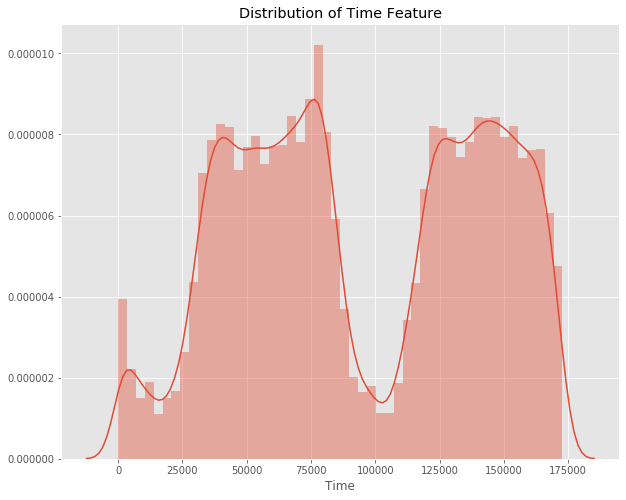

In [9]:
# visualizations of the time feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

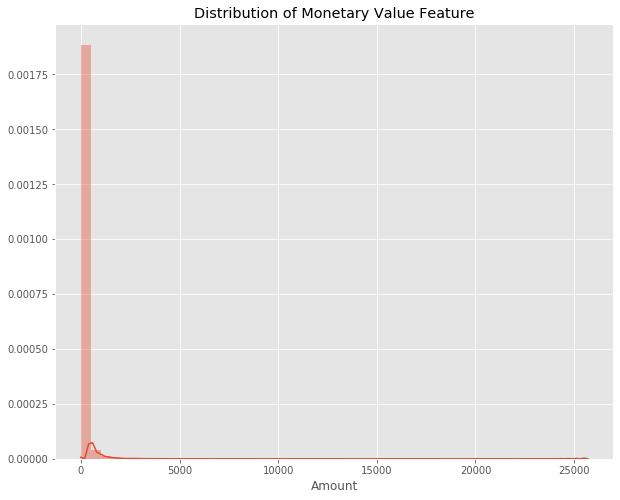

In [10]:
# visualisation of the amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

We find that - around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [11]:
# fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


### 6. Visualising the number of fraudulent and non - fraudulent transactions in the dataset

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

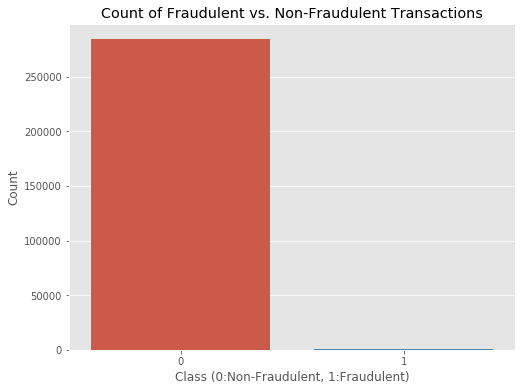

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x = counts.index, y = counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Thus, we find that our dataset is **highly unbalanced**. <br>
The number of non - fraudulent transactions is much high compared to the fraudulent transactions.

### 7. Separating the fraudulent and non - fraudulent parts of the dataset

In [13]:
# 'Class' = 1 - fraudulent transactions
fraud = df[df['Class'] == 1]
# 'Class' = 0 - non - fraudulent or normal transactions
normal = df[df['Class'] == 0] 

In [14]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


### 8. How different are the amount of money used in different transaction classes?

In [15]:
fraud.Amount.describe()

count     492.000
mean      122.211
std       256.683
min         0.000
25%         1.000
50%         9.250
75%       105.890
max      2125.870
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe()

count    284315.000
mean         88.291
std         250.105
min           0.000
25%           5.650
50%          22.000
75%          77.050
max       25691.160
Name: Amount, dtype: float64

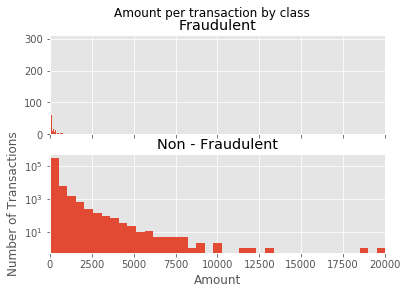

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraudulent')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Non - Fraudulent')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

### 9. Checking if fraudulent transactions occur more often during certain time frame

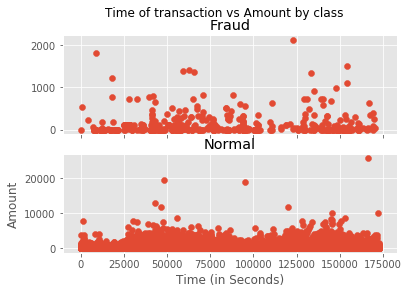

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### 10. Finding correlations - that is determining how different features affect the Class (Fraud or not)

In [19]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

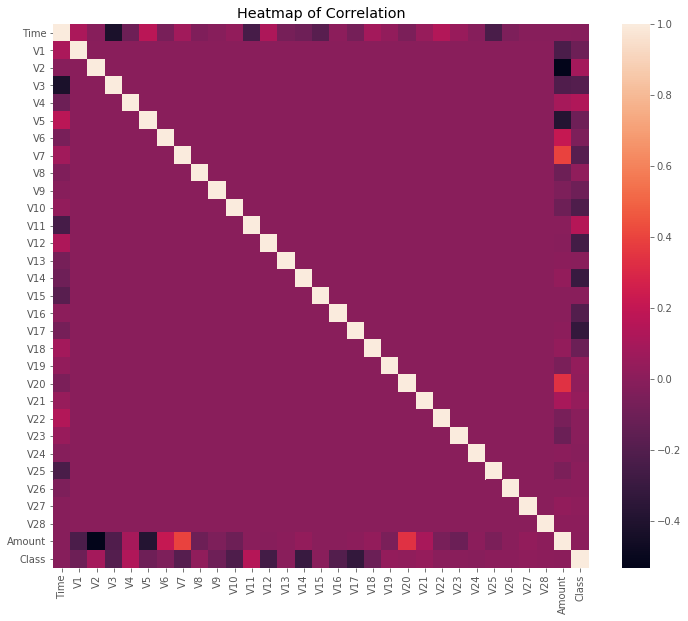

In [20]:
# heatmap - uses color in order to communicate a value to the reader.
corr = df.corr()
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr)
plt.title('Heatmap of Correlation')

From the heatmap, we get an idea of to what degree different features contribute to the transaction being fraudulent or not.

In [21]:
# skewness
# Finding the skewness of the features 
# to ensure that they are not much deviated from the Gaussian distribution
# As presence of much skewness in features may violate our training algo assumptions
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# Data Preprocessing

### 1. Scaling Amount and Time

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
# scaling the time column
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [23]:
# scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [24]:
# concatenating newly created scaled columns with original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
# viewing a random sample of items from an axis of the object
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
111852,72396.0,1.212,1.261,-1.465,1.733,0.636,-2.025,0.766,-0.388,-0.412,...,-0.169,0.377,0.799,-0.314,0.037,0.101,7.63,0,-0.323,-0.472
119396,75433.0,1.222,-0.020,0.224,-0.314,-0.136,-0.146,-0.134,0.014,-0.137,...,0.005,-0.209,0.212,0.989,-0.067,-0.010,10.00,0,-0.313,-0.408
73556,55186.0,1.261,0.346,0.338,0.987,-0.146,-0.608,0.109,-0.147,0.065,...,0.039,-0.162,0.438,-0.600,0.024,0.025,4.99,0,-0.333,-0.834
263512,160989.0,-0.692,0.650,0.766,-0.715,-0.012,0.138,0.076,0.504,0.436,...,-0.309,-0.968,0.020,-0.125,0.053,0.087,39.95,0,-0.194,1.394
4759,4209.0,1.118,0.256,0.897,1.155,-0.277,0.073,-0.366,0.113,1.256,...,0.140,-0.101,0.161,-0.649,0.020,0.015,9.99,0,-0.313,-1.908


In [25]:
# dropping old (unscaled) amount and time columns
df.drop(['Amount', 'Time'], axis = 1, inplace = True)

### 2. Splitting Data into Train and Test sets

In [26]:
# manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256068, 31)
Test Shape: (28739, 31)


In [27]:
# resetting the indices 
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

### 3. Creating a subsample data set with balanced class distributions

In [28]:
# how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 434 fraudulent transactions in the train data.


In [29]:
# storing the non - fraudulent and fraudulent transactions in the train data
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [30]:
# randomly selecting 449 random non - fraudulent transactions
selected = non_fraud.sample(no_of_frauds)
selected.shape

(434, 31)

In [31]:
# printing the first 5 selected items
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
248288,-1.643,0.241,-0.226,-1.015,-2.282,1.496,4.476,-0.698,-0.466,-1.402,...,-0.555,-0.198,-0.391,0.930,-0.454,0.224,-0.203,0,2.691,1.519
2807,-1.045,-1.068,1.508,0.592,-1.959,1.971,1.190,0.398,-0.101,-0.718,...,0.551,1.194,-0.250,-0.827,1.184,-0.004,0.173,0,1.646,-1.941
171382,-0.096,-1.102,2.019,-2.959,-1.400,0.956,-1.720,-0.426,-1.488,0.632,...,0.004,-0.533,0.353,1.408,0.029,0.102,0.150,0,-0.081,0.719
90981,1.335,0.331,-2.058,-0.346,2.583,2.854,-0.188,0.685,-0.287,-0.536,...,-0.650,-0.114,0.916,0.730,0.384,-0.032,0.030,0,-0.350,-0.570
137164,1.929,-0.417,0.164,0.348,-0.652,0.280,-1.063,0.127,2.250,-0.258,...,0.207,0.342,0.756,-0.608,0.383,-0.043,-0.044,0,-0.289,0.055


In [32]:
# resetting the indices
selected.reset_index(drop = True, inplace = True)
fraud.reset_index(drop = True, inplace = True)

In [33]:
# concatenating both (449 fraud and non - fraud transactions) 
# into a subsample data set with equal class distribution
subsample = pd.concat([selected, fraud])
len(subsample) # 449 (fraud) + 449 (non - fraud) = 898

868

In [34]:
# shuffling our data set
subsample = subsample.sample(frac = 1).reset_index(drop = True)

subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,0.315,2.661,-5.920,4.522,-2.315,-2.278,-4.684,1.202,-0.695,-5.526,...,0.064,0.678,0.083,-1.911,0.322,0.621,0.185,1,-0.349,-1.819
1,-9.001,6.613,-12.424,7.520,-10.266,-2.113,-9.984,5.542,-7.384,-13.215,...,-1.225,0.083,0.452,0.464,-0.297,0.527,-0.451,1,1.482,-1.128
2,-0.865,-0.334,1.912,-0.657,0.448,0.967,-0.432,0.458,-1.603,0.066,...,0.802,-0.008,-0.590,0.021,0.033,0.128,0.070,0,-0.263,-0.278
3,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,...,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1,-0.349,-0.560
4,-2.857,4.046,-4.197,5.487,-3.071,-1.423,-5.651,2.020,-5.015,-6.320,...,-0.561,0.103,-0.067,-0.477,-0.104,1.167,0.664,1,-0.349,-1.241
5,-11.321,7.192,-13.179,9.100,-10.095,-2.440,-14.184,4.453,-6.242,-12.618,...,-0.351,0.483,0.661,-0.397,-0.413,-0.998,-0.235,1,-0.202,-0.019
6,-2.327,-3.348,-3.513,3.175,-2.815,-0.203,-0.892,0.333,-0.802,-4.351,...,-0.696,-1.478,-0.062,0.236,0.532,0.302,0.536,1,5.202,-0.754
7,0.206,1.387,-1.045,4.229,-1.648,-0.181,-2.944,0.859,-1.182,-3.097,...,0.345,-0.204,0.377,0.715,0.226,0.629,0.320,1,-0.350,-0.880
8,-4.632,-5.046,-0.175,-0.341,2.479,-3.206,-0.962,0.523,0.470,-1.703,...,0.115,0.314,0.377,0.186,-0.844,0.030,-0.672,0,0.692,-0.450
9,-1.897,1.633,0.168,-1.351,-1.187,-0.535,-0.862,1.635,-0.054,-0.541,...,-0.232,0.193,0.006,-0.234,0.757,0.013,-0.016,0,-0.350,-0.303


### 4. Visualisation of fraud and non - fraud classes in subsample dataset created

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

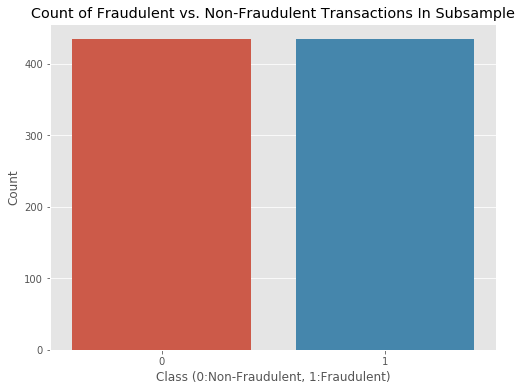

In [35]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

We find that, the distribution of fraud and non - fraud transactions is balanced in our subsample dataset unlike the original highly unbalanced dataset

In [36]:
# taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-4.404e-01
V2,4.904e-01
V3,-5.681e-01
V4,7.064e-01
V5,-3.828e-01
V6,-4.159e-01
V7,-4.802e-01
V8,6.999e-02
V9,-5.546e-01
V10,-6.275e-01


In [37]:
# negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.568
V9,-0.555
V10,-0.627
V12,-0.683
V14,-0.749
V16,-0.595
V17,-0.563


In [38]:
# positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.706
V11,0.687
Class,1.000


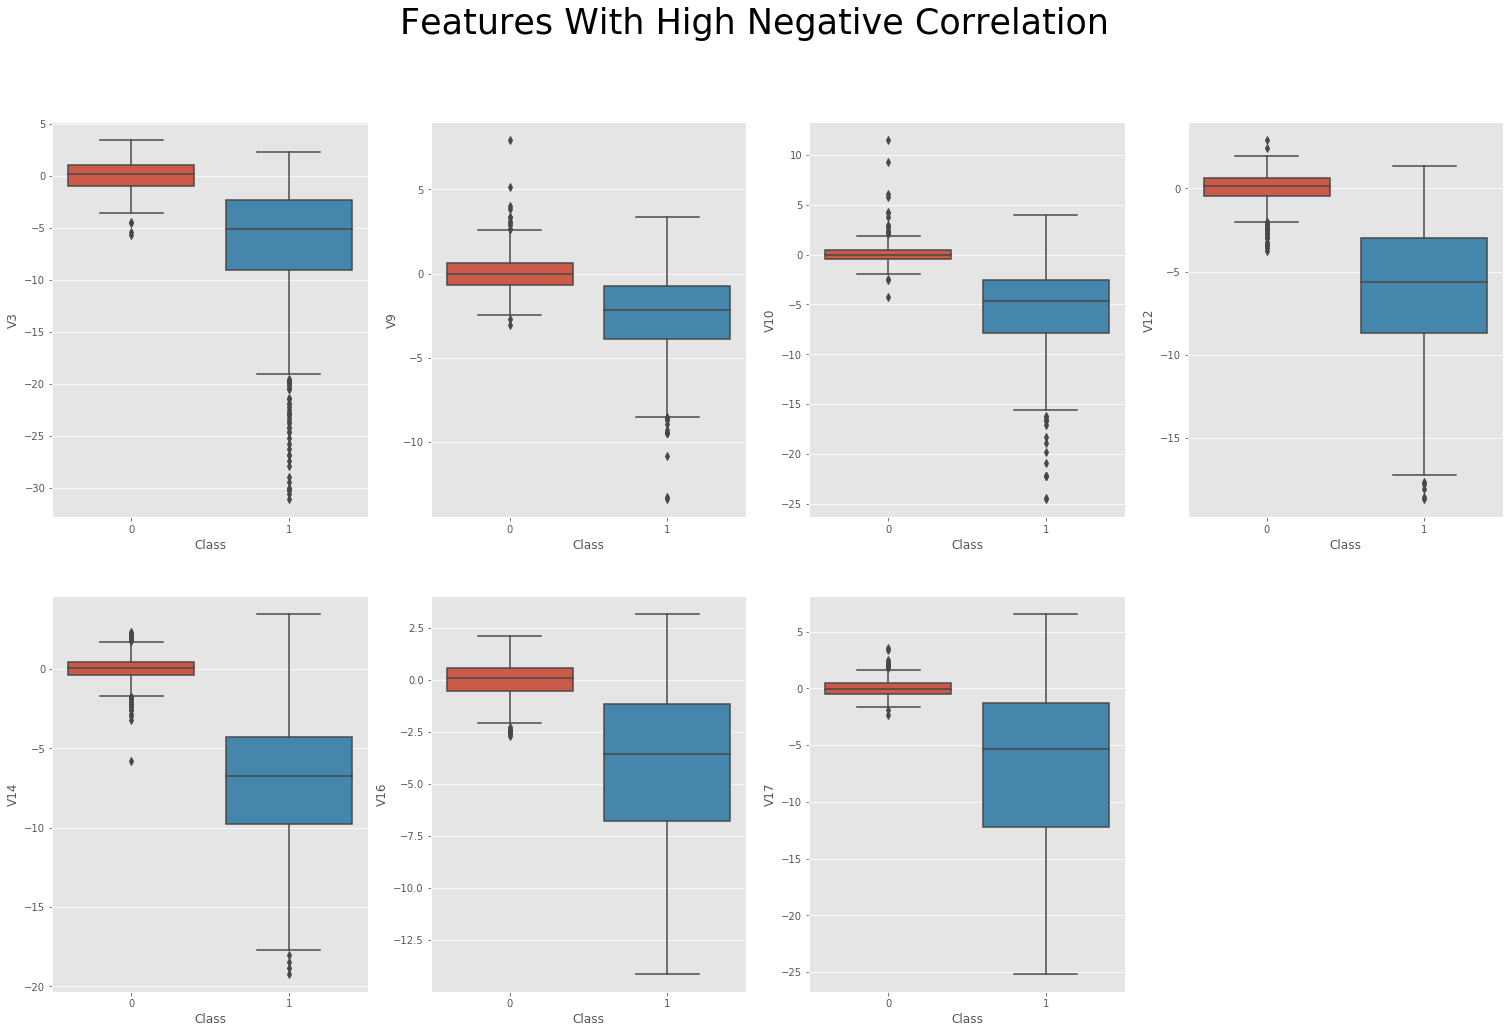

In [39]:
# visualizing the features with high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

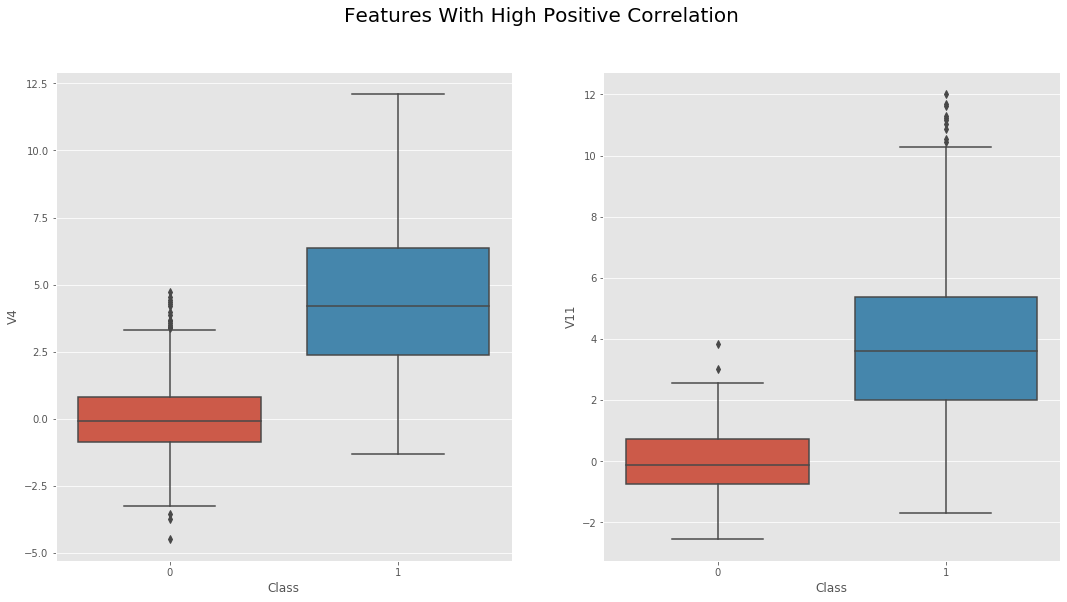

In [40]:
# visualizing the features with high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### 5. Extreme Outlier Removal

In [41]:
# Only removing the extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [42]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 868 transactions by 261 transactions to 607 transactions.


### 6. Dimensionality Reduction

In [43]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [44]:
# t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

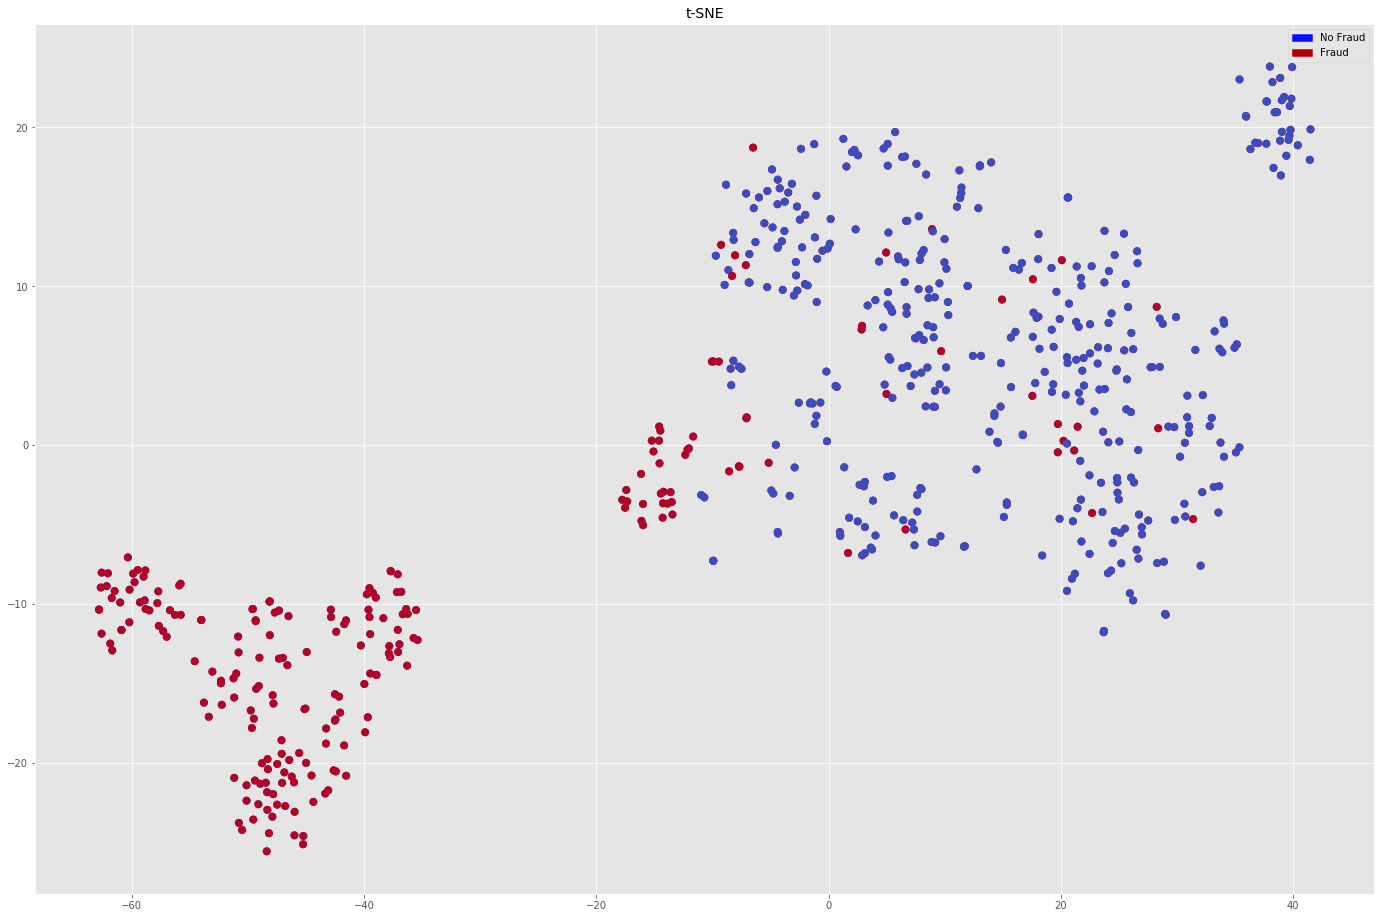

In [45]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


# Classification Algorithms

In [46]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [47]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [49]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (485, 30) (122, 30) 

Y_shapes:
 Y_train: Y_validation:
 (485,) (122,)


In [50]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


## Spot - Checking Algorithms 

Spot-checking algorithms is about getting a quick assessment of a bunch of different algorithms on your machine learning problem so that you know what algorithms to focus on and what to discard.

In [56]:
# Spot - Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

In [57]:
# testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.972078 (0.018413)
LDA: 0.970215 (0.021040)
KNN: 0.945908 (0.039706)
CART: 0.881203 (0.037754)
SVM: 0.959004 (0.031303)
XGB: 0.966627 (0.024585)
RF: 0.963184 (0.023852)


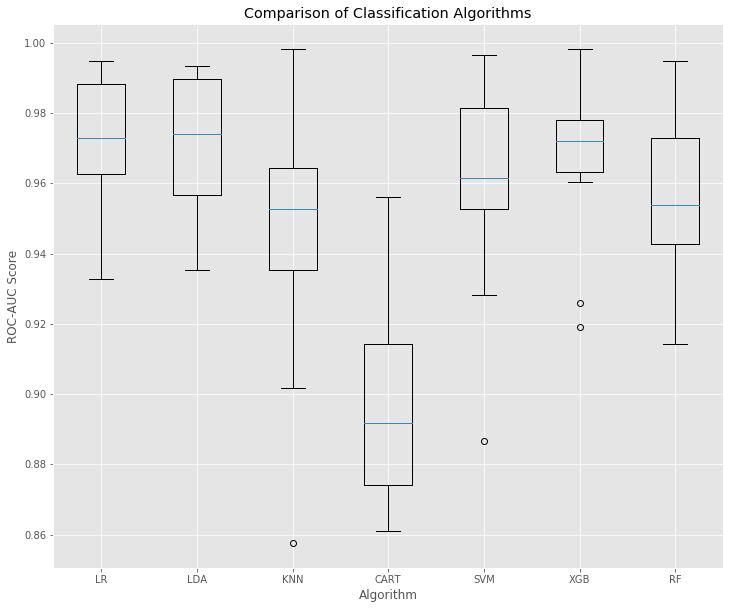

In [53]:
# Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

We find that RF with XGBOOST gives the greatest test accuracy and hence proceed with this algorithm to train our model

In [54]:
conda install -c anaconda graphviz 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [55]:
# visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')